<a href="https://colab.research.google.com/github/BrunetNathan/hello-world/blob/main/TP_01_Low_level_MLP_in_PyTorch_Brunet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron in PyTorch

## Introduction

### Goal
Learn the basics of PyTorch (PT) by working on an artificial classification problem.

### Plan
In this tutorial we will create a set of synthetic data that we will use as an example problem.
Then we will create a MLP model and learn its parameters from the data. Finally we will visualize the different learning measures and the parameters of the model.

In a second part we will modify our data and adapt the hyper-parameters (e.g. number of hidden neurons) of our model to allow better classification.

In the next part we will use the basic functions of PT to understand our process and how PT works. But we will also mention the high level features and aids of PT that facilitate our tasks.


### Use
 
 * Respond to exercices in the next cells.
 * Write your code in between the lines:
 
```
### BEGIN SOLUTION


### END SOLUTION
```

 * You will provide this same notebook completed for assessment.

### Requirements

Python >=3.5

Modules python:
- pytorch >=1.0
- numpy
- matplotlib

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 1. Data generation

In this part, we will generate a data set of 1000 points which is not linearly separable.

#### Create the artificial data sets

## Exercise 1

Create 1000 points of 2 dimensions $(x_0, x_1)$ with their coordinates between 0 et 1 $x_0, x_1 \in [0, 1]$.


## Exercise 2

Assign to each point a binary class $y$ (0 ou 1) following the condition: 
$$
y = \begin{cases}
1 &\text{if $x_0 > 0.2$ et $x_1 > 0.4$}\\
0 &\text{else}
\end{cases}
$$

## Exercise 3

Create a matrix of data `data` with shape `(1000, 3)` with a point per row, the two first columns contain the points coordinates $(x_0, x_1)$ the last column contains the class $y$.

## Exercise 4

Split the data into 3 sets (on matrix for each): 800 points for `train`, 100 points for `valid` and 100 for `test`

## Exercise 5

Visualise the data using a scatter plot (`plt.scatter`).


We expect to find something similar to this:

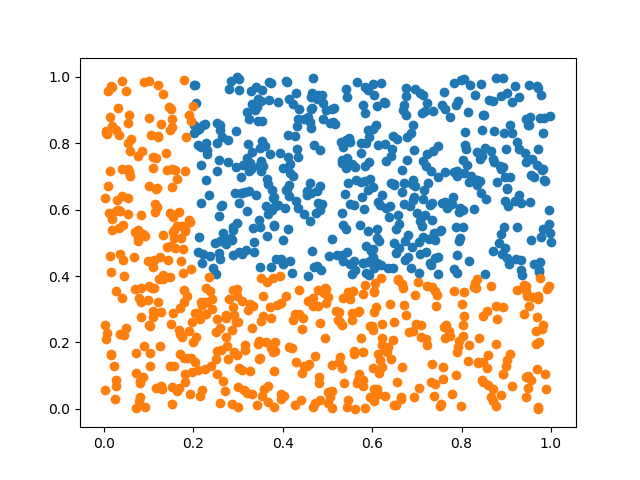

torch.Size([800, 3])


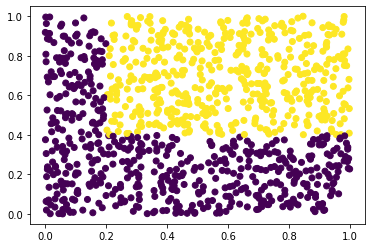

In [8]:
# Generate, split and plot the data
### BEGIN SOLUTION

# Exercice 1
data_size = 1000
x = np.random.random((data_size,2))

# Exercice 2
y = (x[:,0] > 0.2) & (x[:,1]> 0.4)
y = y[:,None]

# Exercice 3
data = np.concatenate((x,y),1)
data = torch.from_numpy(data).float()

# Exercice 4 
train = data[0:800,:]
valid = data[800:900,:]
test = data[900:1000,:]

plt.scatter(data[:,0],data[:,1],c = data[:,2])
print(train.shape)

#data = data > 0.5


### END SOLUTION

**Run the following cell to make sure you have done the previous exercises correctly.**

In [9]:
# Verification des dimensions des donnees
assert data.shape == (1000, 3)

# Verification des division desd donnees
assert train.shape == (800, 3)
assert valid.shape == (100, 3)
assert test.shape == (100, 3)

for dataset in [train, valid, test]:
    # Verification des classes
    assert (dataset[dataset[:,-1]==1,0] > 0.2).all()
    assert (dataset[dataset[:,-1]==1,1] > 0.4).all()
    assert ((dataset[dataset[:,-1]==0,0] <= 0.2) | (dataset[dataset[:,-1]==0,1] <= 0.4)).all()
    
print('Everything looks good!')

Everything looks good!


## 2. Create the model
In this part, we will create, with PyTorch, a model to predict the class $y$ of a point using only its coordinates $(x_0, x_1)$.

The model we will create to classify the data is a Multilayer Perceptron with a single hidden layer:

\begin{align}
h_1 &= \sigma(x W_1 + b_1) \\
\hat{y} &= \sigma(h_1 W_2 + b_2) \\
& \textrm{ avec } & \\
\sigma(t) &= \frac{1}{1+e^{-t}}
\end{align}

$\hat{y}$ will the model's estimation for the class of the point.

## Exercise 6
What are the model parameters?


Model parameters are b1, b2, W1 and W2

### Implementation en PyTorch

First we will do a low level implementation where we will only use the AutoDiff feature (which allows to automatically compute gradients) of PyTorch.

PyTorch has a similar API to numpy. The big difference is that for symbols for which we want to have a gradient, we must include the argument named `requires_grad=True`.

For example $W_1$ is a parameter of the model and we are interested in the gradient of the loss with respect to this symbol. So at initialization time we will add `requires_grad=True`.

## Exercise 7

What the dimensions of each of these symbols: $x, y, W_1, b_1, W_2, b_2$?


x = (1000,2) :
Because there is 1000 points in 2 dimensions  

y = (1000,1) :   
1000 points + classe

According to the input and output dimensions and that dim(h1)=dim(x*W1+b1) and dim(y)=dim(h1*W2+b2), the dimesions of the params must be like this : 
W1 = (2,2)
W2 = (2,1)
b1 = (2,1)
b2 = (1,1)









## Exercise 8
Create a function that initializes and returns a tuple with the MLP  parameters.


In [10]:
# Create the model
def init_mlp(n_input, n_hidden, n_output):    
    ### BEGIN SOLUTION
    w1 = torch.randn((n_input,n_hidden),requires_grad=True)  # w1 and w2 are renerated randomly but b1 and b2 are set to 0 
    w2 = torch.randn((n_hidden,n_output),requires_grad=True)
    b1 = torch.zeros((1,2),requires_grad=True)
    b2 = torch.zeros((1,1),requires_grad=True)
    ### END SOLUTION
    return (w1, b1, w2, b2)
    

params = init_mlp(2, 2, 1) 
print(params[0])

tensor([[-0.2079,  0.3328],
        [-0.6108,  0.2395]], requires_grad=True)


### Run a forward pass of the model on the following data points

## Exercise 8
What is the desired response for the following points?
$$(0.1, 0.5), (0.3, 0.5), (0.3, 0.15), (0.1, 0.15)$$



0 / 1 / 0 / 0

0.3 > 0.2 

0.5 > 0.4

## Exercise 9
Execute the model on the previous points and print $\hat{y}$


In [11]:
### BEGIN SOLUTION  
# Create a function sigmoid(t) that computes the sigmoid function on t
def sigmoid(t):
  # L'entrée doit etre un tensor
  return 1/(1+torch.exp(-t))
# Create a function mlp(x, params) that computes the MLP outputs given the inputs x
def mlp(x,params):
  w1, b1, w2, b2 = params
  h1 = sigmoid(x@w1+b1)
  y = sigmoid(h1@w2+b2)
  return y

# Create a tensor containing the previous points
points = torch.tensor([[0.1,0.5],[0.3,0.5],[0.3,0.15],[0.1,0.15]])


# Call and print output of mlp(points, params) (NOTE: use torch.no_grad())
with torch.no_grad() :
  y = mlp(points,params)
print(y)
### END SOLUTION

tensor([[0.3139],
        [0.3111],
        [0.3104],
        [0.3131]])


Only 75% are well predicted. 

We can observe that the results are not good, because they are far from the expected result.

If we want to compute on our test data the performance of the model we will define an accuracy function, which takes a decision for each data based on $\hat{y}$ and compares it to $y$.

$$
\text{accuracy} = \frac{1}{N} \sum_i^N (1 - abs(y - round(\hat{y}_i))) 
$$

The accuracy represents the rate of correctly classified points. It will be $1$ if all points are correctly classified, $0$ if all are misclassified and $0.5$ if half are well classified.

## Exercise 10

Implement the accuracy using Pytorch functions `torch.mean`, `torch.abs`, `torch.round`.


In [12]:
def accuracy(estimated, reference):
    ### BEGIN SOLUTION
    #print(estimated.shape)
    #print(reference.shape)
    estimated = torch.round(estimated)
    accu = torch.mean(1-torch.abs(reference-estimated))
    return accu
    ### END SOLUTION
reference = torch.tensor([[0],[1],[0],[0]])
accu = accuracy(y,reference)

## Exercise 11

Evaluate and print the score on the `train` set


In [13]:
def score_model(params, data):
  ### BEGIN SOLUTION
  reference = torch.tensor(data[:,[2]])
  estimated = mlp(data[:,0:2],params)
  accu = accuracy(estimated,reference)
  return accu
  ### END SOLUTION
score_train = score_model(params, train)
print("score train : " ,score_train)

score train :  tensor(0.5213, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


## Exercise 12
Do the same with `valid` and `test`


In [14]:
### BEGIN SOLUTION
score_valid = score_model(params,valid)
score_test = score_model(params,test)

print(score_valid)
print(score_test)
### END SOLUTION

tensor(0.6200, grad_fn=<MeanBackward0>)
tensor(0.5200, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


## Exercise 13

Explain the results.

Le modèle n'est pas encore entrainé, on est proche du hasard

## 4. Training the model

To find the best parameters for our model we will enter it with the training data. For this we will define a cost function to optimize.

As we are trying to solve a binary classification task, we will use the crossentropy cost function:

$$
\mathcal{L} = \sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
$$

## Exercise 14
Implement the cost function in PyTorch.


In [16]:
def bce(est, ref):
    ### BEGIN SOLUTION
    bce = torch.sum(-ref*torch.log(est)-(1-ref)*torch.log(1-est))
    return bce
    ### END SOLUTION

To train our model by means of Gradient Descent (GD) we will iteratively update with small increments our parameters:

\begin{align}
W_1^n &= W_1^{n-1} - \eta \frac{\delta \mathcal{L}}{\delta W_1} \\
b_1^n &= b_1^{n-1} - \eta \frac{\delta \mathcal{L}}{\delta b_1} \\
W_2^n &= W_2^{n-1} - \eta \frac{\delta \mathcal{L}}{\delta W_2} \\
b_2^n &= b_2^{n-1} - \eta \frac{\delta \mathcal{L}}{\delta b_2}
\end{align}

Where $\eta$ is our learning rate.

We need to calculate the gradients:
$$
\frac{\delta \mathcal{L}}{\delta W_1}, \frac{\delta \mathcal{L}}{\delta b_1}, \frac{\delta \mathcal{L}}{\delta W_2}, \frac{\delta \mathcal{L}}{\delta b_2}
$$

For the gradients of the cost function with respect to the parameters, we could calculate them by hand. But we are lazy. So we will use PyTorch `error.backward()` will do this for us in an optimized way using Dynamic Programming (DP) and populate the tensors with the gradients.

Finally we will run a training of 10 `epochs` with a `batch_size=100`.
For this we will do the following steps:
1. Calculate the number of iterations (`n_iterations`) per epoch (remember that an iteration is an update of the parameters and an epoch is a competing use of all our training data)
2. Create a session
3. Initialize the variables
4. For each epoch (`for epoch in range(n_epochs):`)
    1. Randomly reorder the `train` data (use `torch.randperm()`)
    2. Evaluate and print the model score on the training data
    3. For each iteration (`for iteration in range(n_iterations):`)
        1. Select a block of `batch_size` examples
        2. *Zero the gradients*
        3. Run the forward pass on the model (`mlp()`)
        4. Compute the loss (`bce()`)
        5. Compute the gradients
        6. *Update the parameters doing gradient descent*

**Note:** Remember that PyTorch keeps track of all the operations you make with tensors to build the DAG graph. In some cases we want to avoid that, such as when setting the gradients to zero or performing the gradient descent update of the parameters. In those cases we may encapsulate the operations inside a `with torch.no_grad():` context clause. Furthermore the `grad` attribute of the tensors, may be `None` (no need to set to zero in this case) during the first run so one may do:

```
with torch.no_grad():
    if param.grad is not None:
        param.grad.zero_()

```

**Note:** When performing the parameter update of gradient descent, make sure not to reassign to the parameter a new tensor object. To avoid doing so use an inplace operation:

```
with torch.no_grad():
    param -= eta * param.grad
```

If you erronously do this `param = param - eta * param.grad`, `param` will point to a new tensor, not the original parameters of the model.

**Note:** Zero the gradients means accessing the gradient of each parameter and setting it to zero. We need this because PyTorch `.backward()` method accumulates the gradients instead of replacing them.
    
## Exercise 15

Implement and run a train loop for the model.

In [17]:
def train_model(params, data, eta=0.05, n_epochs=1, batch_size=16):
    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    
    for epoch in range(n_epochs):
        ### BEGIN SOLUTION
        # Randomly reorder the `train` data (use `torch.randperm()`)
        data = data[torch.randperm(n_data)]
        # Evaluate and print the model score on the training data
        score = score_model(params,data)
        print(score)
        ### END SOLUTION    
        
        for iteration in range(n_iterations):
            ### BEGIN SOLUTION

            # 1. Select a block of `batch_size` examples
            batch = data[iteration*batch_size:(iteration+1)*batch_size,:]

            # 2. Run the forward pass on the model

            y_hat = mlp(batch[:,0:2],params)

            # 3. Compute the error

            loss = bce(y_hat,batch[:,[2]])

            # 4. Zero the gradients of each of the parameters because .bacward() accumulates them
            with torch.no_grad():
              for param in params :
                if param.grad is not None:
                  param.grad.zero_()

            # 5. Compute the gradients

            loss.backward()

            # 6. Update the parameters using their gradients
            with torch.no_grad():
              for param in params :
                param -= eta * param.grad

    return params
            ### END SOLUTION

params = init_mlp(2, 2, 1)                    
train_model(params, train, eta=0.05, n_epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(0.4787, grad_fn=<MeanBackward0>)
tensor(0.5537, grad_fn=<MeanBackward0>)
tensor(0.8500, grad_fn=<MeanBackward0>)
tensor(0.8475, grad_fn=<MeanBackward0>)
tensor(0.7663, grad_fn=<MeanBackward0>)
tensor(0.7962, grad_fn=<MeanBackward0>)
tensor(0.8462, grad_fn=<MeanBackward0>)
tensor(0.8462, grad_fn=<MeanBackward0>)
tensor(0.8475, grad_fn=<MeanBackward0>)
tensor(0.8537, grad_fn=<MeanBackward0>)
tensor(0.8587, grad_fn=<MeanBackward0>)
tensor(0.8525, grad_fn=<MeanBackward0>)
tensor(0.8775, grad_fn=<MeanBackward0>)
tensor(0.9000, grad_fn=<MeanBackward0>)
tensor(0.9212, grad_fn=<MeanBackward0>)
tensor(0.9400, grad_fn=<MeanBackward0>)
tensor(0.9550, grad_fn=<MeanBackward0>)
tensor(0.9137, grad_fn=<MeanBackward0>)
tensor(0.9712, grad_fn=<MeanBackward0>)
tensor(0.9513, grad_fn=<MeanBackward0>)
tensor(0.9850, grad_fn=<MeanBackward0>)
tensor(0.9613, grad_fn=<MeanBackward0>)
tensor(0.9762, grad_fn=<MeanBackward0>)
tensor(0.9550, grad_fn=<MeanBackward0>)
tensor(0.9787, grad_fn=<MeanBackward0>)


(tensor([[ -0.7657, -15.4818],
         [ 16.3384,   1.5689]], requires_grad=True),
 tensor([[-5.7903,  1.6715]], requires_grad=True),
 tensor([[ 15.1573],
         [-15.3837]], requires_grad=True),
 tensor([[-7.8188]], requires_grad=True))

The score increase with the iterations (epochs)

## 5. Visualization of the model

To monitor the evolution of the learning of our model, we will visualize the value of the cost function, the classification score and the parameters of the first layer of our model.  

We will run our experiments with different values of the following hyperparameters to better understand their effect:
- `learning_rate`
- `batch_size`


### Visualization of the cost function

The cost function is the value we aim to reduce with the training iterations. To visualize it we will create an empty list (`couts = []`) at the beginning of our training and we will add (`couts.append(cout)`) the value resulting from the cost at each iteration. At the end of the training we will visualize the curve (`plt.plot(costs)`).

## Exercise 16
Rewrite the `train_model` function so that it returns the average loss of every epoch. Run it and plot the loss of a training procedure. While we are at it, make the printing optional with an additional keyword argument.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


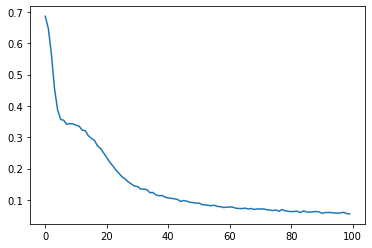

In [18]:
def train_model(params, data, eta=0.05, n_epochs=1, batch_size=16, verbose=False):
    losses = []

    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    
    for epoch in range(n_epochs):
        ### BEGIN SOLUTION
        # Randomly reorder the `train` data (use `torch.randperm()`)
        data = data[torch.randperm(n_data)]
        # Evaluate and print the model score on the training data
        score = score_model(params,data)

        cout = []
        #print(score)
        ### END SOLUTION    
        
        for iteration in range(n_iterations):
            ### BEGIN SOLUTION

            # 1. Select a block of `batch_size` examples
            batch = data[iteration*batch_size:(iteration+1)*batch_size,:]

            # 2. Run the forward pass on the model

            y_hat = mlp(batch[:,0:2],params)

            # 3. Compute the error

            loss = bce(y_hat,batch[:,[2]])
            cout.append(loss/batch_size)
            #losses.append(loss)

            # 4. Zero the gradients of each of the parameters because .bacward() accumulates them
            with torch.no_grad():
              for param in params :
                if param.grad is not None:
                  param.grad.zero_()

            # 5. Compute the gradients

            loss.backward()

            # 6. Update the parameters using their gradients
            with torch.no_grad():
              for param in params :
                param -= eta * param.grad
        losses.append(sum(cout)/len(cout))           
    return losses
            ### END SOLUTION


params = init_mlp(2, 2, 1)                    
losses = train_model(params, train, eta=0.05, n_epochs=100)
plt.plot(losses)

Because the model is getting better, the loss decrease with the epochs 

### Effect of the learning rate

We will run our learning with different learning rates to see its effect on the cost function.

## Exercise 17
Display the training loss curve for learning rates `[0.5, 0.05, 0.005, 0.0005]`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


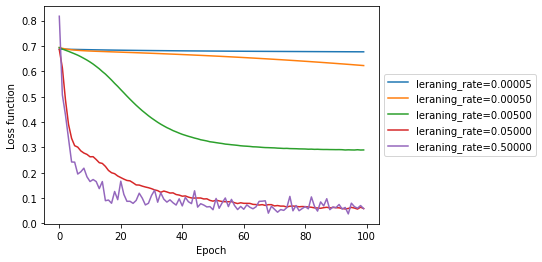

In [32]:
learning_rates = [0.5, 0.05, 0.005, 0.0005, 0.00005]
n_epochs = 100
batch_size = 16



losses = {}

# Train a model with each learning rate and populate losses with the learning rate as key and the loss series as values
### BEGIN SOLUTION
for eta in learning_rates :
  params = init_mlp(2, 2, 1) 
  losses[eta]= train_model(params,train,eta,n_epochs,batch_size,False)

### END SOLUTION

plt.figure()
for lr, loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'leraning_rate={lr:.5f}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch');

With a too small learning rate, the loss does not decrease. With a too high lr, it is instable 

### Effect of batch size

We will now run our training with different batch sizes to see its effect on the cost function.

## Exercise 18

Display the cost function evaluated on all training data at each epoch for batch sizes `[n_data, 100, 50, 10, 5, 1]`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


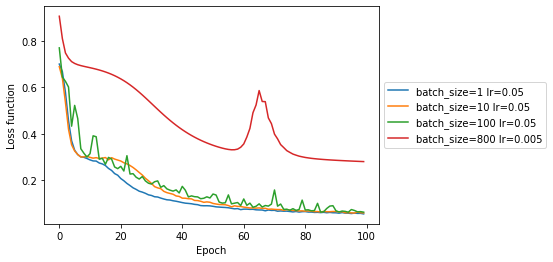

In [35]:
n_data = train.shape[0]

n_epochs = 100
batch_sizes = [n_data, 100, 10, 1]
lrs = [0.005, 0.05, 0.05, 0.05]
eta = 0.05
losses = {}

### BEGIN SOLUTION
for batch_size,eta in zip(batch_sizes,lrs) :
    params = init_mlp(2, 2, 1) 
    losses[str(batch_size),str(eta)]= train_model(params,train,eta,n_epochs,batch_size,False)
### END SOLUTION

# Visualiser les courbes de cout
plt.figure()
for (bs, lr), loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'batch_size={bs} lr={lr}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch');

The batch size is important too

### Visualization of the performance

Another value worth monitoring is the classification accuracy of the model.

## Exercise 19

Visualize the accuracy on the train, valid and test data on each epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


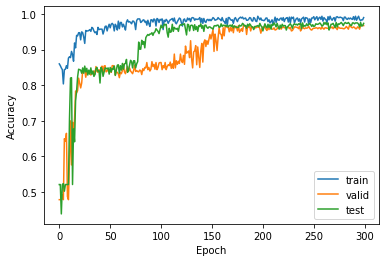

In [18]:
n_data = train.shape[0]

def train_model(params, data, eta=0.05, n_epochs=1, batch_size=16, verbose=False):
    losses = []
    acc=[]

    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    
    for epoch in range(n_epochs):
        ### BEGIN SOLUTION
        # Randomly reorder the `train` data (use `torch.randperm()`)
        data = data[torch.randperm(n_data)]
        # Evaluate and print the model score on the training data
        score = score_model(params,data)

        cout = []
        #print(score)
        ### END SOLUTION    
        
        for iteration in range(n_iterations):
            ### BEGIN SOLUTION

            # 1. Select a block of `batch_size` examples
            batch = data[iteration*batch_size:(iteration+1)*batch_size,:]

            # 2. Run the forward pass on the model

            y_hat = mlp(batch[:,0:2],params)

            # 3. Compute the error

            loss = bce(y_hat,batch[:,[2]])
            cout.append(loss/batch_size)
            #losses.append(loss)

            # 4. Zero the gradients of each of the parameters because .bacward() accumulates them
            with torch.no_grad():
              for param in params :
                if param.grad is not None:
                  param.grad.zero_()

            # 5. Compute the gradients

            loss.backward()

            # 6. Update the parameters using their gradients
            with torch.no_grad():
              for param in params :
                param -= eta * param.grad
        losses.append(sum(cout)/len(cout)) 
        acc.append(score_model(params,train))          
    return acc

n_epochs = 300
batch_size = 10
learning_rate_value = 0.07

accuracies = {}

accuracies['train'] = []
accuracies['valid'] = []
accuracies['test'] = []

### BEGIN SOLUTION
params_train = init_mlp(2,2,1)
params_test = init_mlp(2,2,1)
params_valid = init_mlp(2,2,1)

accuracies['train'] = train_model(params_train,train,learning_rate_value,n_epochs,batch_size)
accuracies['valid'] = train_model(params_valid,valid,learning_rate_value,n_epochs,batch_size)
accuracies['test'] = train_model(params_test,test,learning_rate_value,n_epochs,batch_size)
    
### END SOLUTION

plt.figure()
for split, v in accuracies.items():
    plt.plot(v, label=split)

plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.xlabel('Epoch');

As we can see, the accuracy increase with the epochs because the model is getting trained. 

### Visualization of the model parameters

For pedagogical reasons we will now visualize the parameters of the model with its geometrical interpretation.
We will represent the parameters of the first layer of the MLP as a line (the decision boundary).

In [ ]:
def plot_decision_boundaries(w, b, ax=None, **kwargs):
    ax = ax or plt.gca()
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    arts = []
    for i in range(w.shape[1]):
        w_i = w[:, i]
        if len(b.shape)==1:
            b_i = b[i]
        else:
            b_i = b[:, i]
        
        intersections = []
        
        if w_i[1] != 0:
            yx0 = -w_i[0]/w_i[1] * x0 - b_i/w_i[1]
            yx1 = -w_i[0]/w_i[1] * x1 - b_i/w_i[1]
            
            if y0 <= yx0 <= y1:
                intersections.append((x0, yx0))
            
            if y0 <= yx1 <= y1:
                intersections.append((x1, yx1))
            
        if w_i[0] != 0:
            xy0 = -w_i[1]/w_i[0] * y0 - b_i/w_i[0]
            xy1 = -w_i[1]/w_i[0] * y1 - b_i/w_i[0]
            
            if x0 <= xy0 <= x1:
                intersections.append((xy0, y0))
            
            if x0 <= xy1 <= x1:
                intersections.append((xy1, y1))

        if len(intersections) == 2:
            xs, ys = zip(*intersections)
            lines, = ax.plot(xs, ys, **kwargs)
        
            arts.append(lines)
    
    ax.set_xlim([x0, x1])
    ax.set_ylim([y0, y1])
    
    return arts
        
def plot_model_and_data(params, dat=None, sel=None, ax=None):
    w, b, _, _ = params
    ax = ax or plt.gca()
    ax.set_prop_cycle(None)
    prop_cycle = ax._get_patches_for_fill.prop_cycler

    import itertools
    props = list(itertools.islice(prop_cycle, 3))
    
    all_arts = []
    
    if dat is not None:
        arts = ax.scatter(dat[dat[:,-1]==1,0], dat[dat[:,-1]==1,1], 
                            facecolors='none', edgecolors=props[0]['color'], alpha=0.2)
        all_arts.append(arts)

        arts = ax.scatter(dat[dat[:,-1]==0,0], dat[dat[:,-1]==0,1], 
                            facecolors='none', edgecolors=props[1]['color'], alpha=0.2)
        all_arts.append(arts)
    
    if sel is not None:
        arts = ax.scatter(sel[sel[:,-1]==1,0], sel[sel[:,-1]==1,1], 
                            facecolors=props[0]['color'], edgecolors=props[0]['color'])
        all_arts.append(arts)

        arts = ax.scatter(sel[sel[:,-1]==0,0], sel[sel[:,-1]==0,1], 
                            facecolors=props[1]['color'], edgecolors=props[1]['color'])
        all_arts.append(arts)
    
    line_arts = plot_decision_boundaries(w.detach().numpy(), b.detach().numpy(),
                             ax=ax,
                             color=props[2]['color'],
                             linewidth=2.0)
    all_arts += line_arts
    
    return all_arts

You can use the two functions created above to visualize a learning animation. You simply get the value returned by the function `plot_model_and_data(params, sel=train, ax=ax)` after each epoch. 

```
art = plot_model_and_data(params, sel=train, ax=ax)
arts.append(art)
``` 

## Exercise 20
Visualise the decision boundaries during a training procedure.

In [ ]:
n_data = train.shape[0]

n_epochs = 250
batch_size = 10
learning_rate_value = 0.005

arts = []
fig, ax = plt.subplots()

### BEGIN SOLUTION

### END SOLUTION

anim = animation.ArtistAnimation(fig, arts, interval=50, repeat_delay=3000, blit=True);
HTML(anim.to_jshtml())

## [Optional] Exercise 21

Implement another (or all) alternative optimizers that we have seen in the lecture. Plot the loss curves of them on a same plot together with vanilla SGD.